Finding and cleaning the following:
1) Missing Data
2) Irregular Data (Outliers)
3) Unnecessary Data — Repetitive Data, Duplicates and more
4) Inconsistent Data — Capitalization, Addresses and more

In [60]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
import re
from matplotlib.pyplot import figure

Brief look at the data

In [61]:

matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = "warn"

# read the data

df = pd.read_csv('Dataset/cleanedReviewsDateset.csv',low_memory=False,encoding="ISO-8859-1")
    
# print(df.head())

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)




(72720, 11)
product_id              int64
page                    int64
page_order              int64
recommended              bool
date                   object
text                   object
hours                 float64
username               object
products              float64
early_access             bool
products_ismissing       bool
dtype: object
['product_id' 'page' 'page_order' 'hours' 'products']
['recommended' 'date' 'text' 'username' 'early_access'
 'products_ismissing']


In [68]:
# Missing Data Heatmap
cols = df.columns[df.columns !='b'] 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
# colours = ['#ffff00', '#000099']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Missing Data Percentage List

In [63]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

product_id - 0%
page - 0%
page_order - 0%
recommended - 0%
date - 0%
text - 0%
hours - 0%
username - 1%
products - 0%
early_access - 0%
products_ismissing - 0%


Missing Data Histogram

created missing indicator for: username


<AxesSubplot:xlabel='index'>

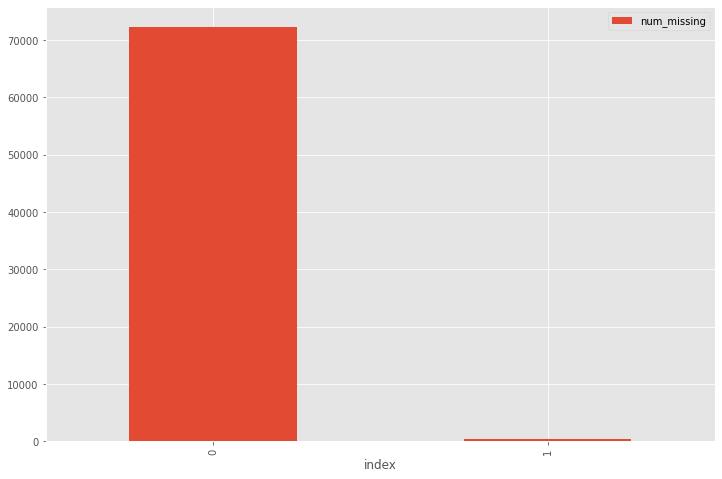

In [64]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


Dropping the Features:
user_id, found_funny and compensation are the features that does not provide useful information to our case study that's why we are deleting these columns.

In [65]:
keep_col = ['product_id','page','page_order','recommended','date','text','hours','username','products','early_access']
df = df[keep_col]


Counting the missing values

In [66]:
print(df.isnull().sum())

product_id        0
page              0
page_order        0
recommended       0
date              0
text              0
hours             0
username        504
products          0
early_access      0
dtype: int64


Irregular data (Outliers):
Outliers are data that is distinctively different from other observations. They could be real outliers or mistakes.

In [67]:
# make text column in lower case
df['text'] = df['text'].str.lower()
df['username']=df['username'].str.lower()
# Removal of Special Characters
df['text'] = df['text'].map(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
# Removal of Special Characters
df['username'] = df['username'].map(str).apply(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
# Date time formatiing

df['date'] = pd.to_datetime(df['date'],errors='coerce')
# print(df['date'])

# # replacing the date cell which contain null values with previous values
df['date'] =df['date'].fillna("2022-01-01")

#Removal of special characters
df['text']=df['text'].str.replace('[#,@,&,=,+,-,&&,||,!,(,),{,},[,],^,`,~,*,?,:]','')
df['text'] = df['text'].map(lambda x: re.sub('[^\w\s]', '', x))

C:\Users\Keneki\AppData\Local\Temp/ipykernel_11912/2141764207.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[#,@,&,=,+,-,&&,||,!,(,),{,},[,],^,`,~,*,?,:]','')


KeyboardInterrupt: 

Impute the Missing:
When the feature is a numeric variable, we can conduct missing data imputation. We replace the missing values with the average or median value from the data of the same feature that is not missing.When the feature is a categorical variable, we may impute the missing data by the mode (the most frequent value)

In [ ]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
    
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna("top")
           
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)


# val = df['text'].describe()['top']
# print(val)
# df['text'] = df['text'].fillna(method="bfill")

# val = df['username'].describe()['top']
# print(val)
# df['username'] = df['username'].fillna("noName")
# print(df)

# val = df['products'].describe().median()
# print(val)
# df['products'] = df['products'].fillna(val)
# print(df.isnull().sum())



    

Removing the line breaks in the reviews

In [ ]:
df['text']=df['text'].str.replace("\r"," ")
df['text']=df['text'].str.replace("\n"," ")
df['text']=df['text'].str.replace('\*','',regex=True)
df['text']=df['text'].str.strip()

Removing the reviews which length is less then 40

In [ ]:
df['text'] = df['text'].astype('str')
mask = (df['text'].str.len() > 100)
df = df.loc[mask]
# print(df)

Making the file with new dataFrame

In [ ]:
df.to_csv("Dataset/cleanedReviewsDateset.csv",encoding = 'utf-8',index=False)